<a href="https://colab.research.google.com/github/Er-Yash/Stock_analysis_Prediction/blob/main/stock_analysisprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn

In [2]:
pip install numpy pandas matplotlib tensorflow yfinance

In [3]:
pip install yfinance

In [4]:
import yfinance as yf

# Define the ticker symbol and date range
ticker_symbol = "AAPL"  # Replace with the symbol of the stock you want to analyze
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv("stock_data.csv")
# data.show()







[*********************100%%**********************]  1 of 1 completed


# ***LinearRegression***

[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 6.12


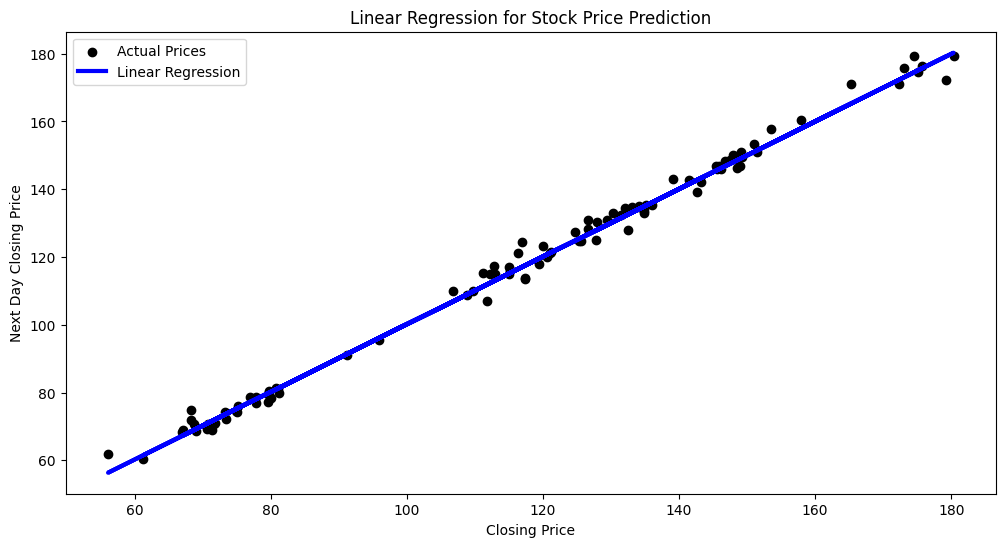

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf
import matplotlib.pyplot as plt

# Replace 'AAPL' with the stock symbol you want to analyze
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-12-31'

# Download historical stock data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Use 'Close' price as the target variable
data['Target'] = data['Close'].shift(-1)

# Drop the last row since it will have NaN values in the 'Target' column
data = data[:-1]

# Use 'Close' price as the input feature
X = data[['Close']].values
y = data['Target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Prices')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear Regression')
plt.title('Linear Regression for Stock Price Prediction')
plt.xlabel('Closing Price')
plt.ylabel('Next Day Closing Price')
plt.legend()
plt.show()


# ***LSTM***

[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
13/13 [==============================] - 10s 24ms/step - loss: 0.0681
Epoch 2/10
13/13 [==============================] - 0s 22ms/step - loss: 0.0099
Epoch 3/10
13/13 [==============================] - 0s 21ms/step - loss: 0.0050
Epoch 4/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0027
Epoch 5/10
13/13 [==============================] - 0s 22ms/step - loss: 0.0018
Epoch 6/10
13/13 [==============================] - 0s 26ms/step - loss: 0.0016
Epoch 7/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0014
Epoch 8/10
13/13 [==============================] - 0s 22ms/step - loss: 0.0014
Epoch 9/10
13/13 [==============================] - 0s 29ms/step - loss: 0.0014
Epoch 10/10
3/3 [==============================] - 0s 15ms/step


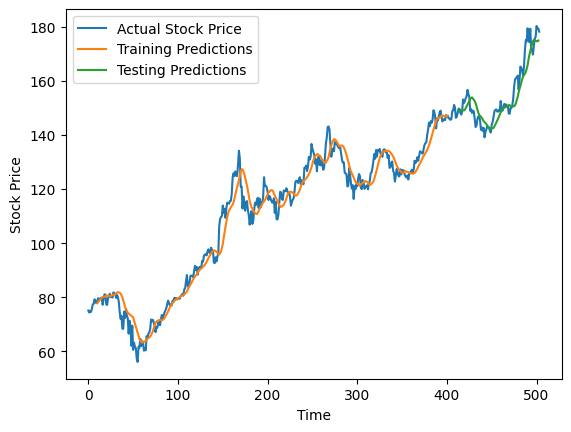

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the stock price data
# You can use any dataset or API to get historical stock prices
# For this example, I'll use the Yahoo Finance API and the yfinance library
# Install yfinance: pip install yfinance
import yfinance as yf

# Replace 'AAPL' with the stock symbol you want to analyze
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-12-31'

data = yf.download(stock_symbol, start=start_date, end=end_date)

# Select the 'Close' prices for analysis
df = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Split the data into training and testing sets
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[0:train_size, :], df_scaled[train_size:len(df_scaled), :]

# Create the dataset
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape the input data to be 3D [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Plot the results
train_predict_plot = np.empty_like(df_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_steps:len(train_predict) + time_steps, :] = train_predict

test_predict_plot = np.empty_like(df_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_steps * 2) + 1:len(df_scaled) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(df_scaled), label='Actual Stock Price')
plt.plot(train_predict_plot, label='Training Predictions')
plt.plot(test_predict_plot, label='Testing Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# ***SVM***

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import yfinance as yf

# Replace 'AAPL' with the stock symbol you want to analyze
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-12-31'

# Download historical stock data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Create a binary target variable: 1 if the closing price increases the next day, 0 otherwise
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Use features such as Open, High, Low, and Close as input features
features = ['Open', 'High', 'Low', 'Close']

# Create feature matrix X and target variable y
X = data[features].values
y = data['Target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


[*********************100%%**********************]  1 of 1 completed
Accuracy: 0.51
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.51      1.00      0.68        52

    accuracy                           0.51       101
   macro avg       0.26      0.50      0.34       101
weighted avg       0.27      0.51      0.35       101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Comparission from graph of ' SVM ' , ' Linear Regression ' and ' LSTM '

[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
16/16 [==============================] - 8s 13ms/step - loss: 0.4130
Epoch 2/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0517
Epoch 3/10
16/16 [==============================] - 0s 14ms/step - loss: 0.0318
Epoch 4/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0276
Epoch 5/10
16/16 [==============================] - 0s 19ms/step - loss: 0.0263
Epoch 6/10
16/16 [==============================] - 0s 19ms/step - loss: 0.0244
Epoch 7/10
16/16 [==============================] - 0s 19ms/step - loss: 0.0231
Epoch 8/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0223
Epoch 9/10
16/16 [==============================] - 0s 18ms/step - loss: 0.0209
Epoch 10/10
4/4 [==============================] - 1s 4ms/step


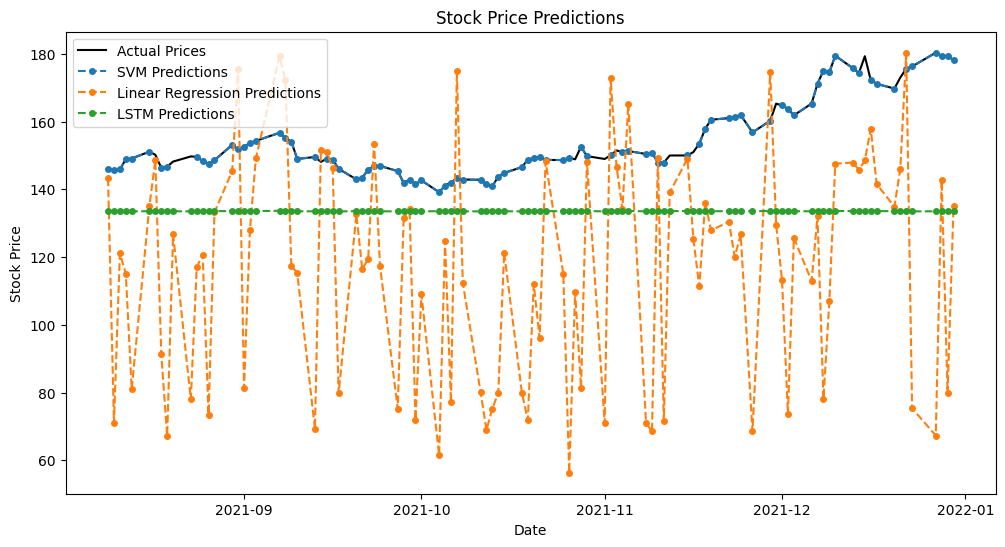

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf
import matplotlib.pyplot as plt

# Replace 'AAPL' with the stock symbol you want to analyze
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-12-31'

# Download historical stock data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Create a binary target variable for SVM: 1 if the closing price increases the next day, 0 otherwise
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Use features such as Open, High, Low, and Close as input features
features = ['Open', 'High', 'Low', 'Close']

# Create feature matrix X and target variable y for SVM
X = data[features].values
y_svm = data['Target'].values

# Linear Regression: Use 'Close' price as the input feature
X_lr = data[['Close']].values
# Shift 'Close' price to create the target variable
y_lr = data['Close'].shift(-1).values[:-1]

# LSTM: Use 'Close' price as the input feature
df = data['Close'].values.reshape(-1, 1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

time_steps = 10
X_lstm, y_lstm = [], []

for i in range(len(df_scaled) - time_steps - 1):
    X_lstm.append(df_scaled[i:(i + time_steps), 0])
    y_lstm.append(df_scaled[i + time_steps, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Split the data into training and testing sets for SVM and Linear Regression
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y_svm, test_size=0.2, random_state=42)
# Use y_lr[:-1] to match the length of X_lr# Linear Regression: Use 'Close' price as the input feature
X_lr = data[['Close']].values[:-1]  # Exclude the last row to match the length of y_lr
# Shift 'Close' price to create the target variable
y_lr = data['Close'].shift(-1).values[:-1]

# Split the data into training and testing sets for SVM and Linear Regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)


# SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_svm, y_train_svm)
y_pred_svm = svm_model.predict(X_test_svm)
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=32)

# Make predictions using the LSTM model
train_predict_lstm = lstm_model.predict(X_lstm)

X_test_lstm = np.reshape(X_test_lr, (X_test_lr.shape[0], X_test_lr.shape[1], 1))
test_predict_lstm = lstm_model.predict(X_test_lstm)


train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)

# Plot the results
plt.figure(figsize=(12, 6))

# Actual Prices
plt.plot(data.index[-len(y_test_svm):], data['Close'].iloc[-len(y_test_svm):], label='Actual Prices', color='black')

# SVM Predictions
plt.plot(data.index[-len(y_test_svm):], np.where(y_pred_svm == 1, data['Close'].iloc[-len(y_test_svm):], np.nan),
         label='SVM Predictions', linestyle='dashed', marker='o', markersize=4)

# Linear Regression Predictions
plt.plot(data.index[-len(y_test_lr):], y_pred_lr, label='Linear Regression Predictions', linestyle='dashed', marker='o',
         markersize=4)

# LSTM Predictions
plt.plot(data.index[-len(y_test_lr):], test_predict_lstm, label='LSTM Predictions', linestyle='dashed', marker='o',
         markersize=4)

plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


<!-- Load your stock price data from a CSV file (replace 'your_stock_data.csv' with your data file).

Split the data into training and testing sets.

Create a Linear Regression model and train it with the training data.

Predict stock prices for the test data.

Plot the actual vs. predicted stock prices.

Predict the stock price for the next day using the trained model. -->